## 1. Terms

Untuk menjawab soal di atas, perlu menyamakan terms agar konteksnya jelas:
1. Jabodetabek = meliputi Jakbar, Jakpus, Jaktim, Jaksel, Jakut, Kot/Kab Bekasi, Tangerang, Tangsel, Bogor, Depok
2. Mudik = tidak berada di Jabodetabek saat masa libur lebaran (terhitung 30 Mei selama 2 minggu)
3. Mudik Lebaran = tidak berada di Jabodetabek saat hari-H Lebaran (5 Juni)
4. Banyak Mudik = jumlah hari saat di luar Jabodetadek dalam masa libur lebaran
5. Lapis Legit Zulaikha = oleh2 khas Medan

## 2. Eksplorasi Data

Disediakan 2 buah data karyawan *__TokoLapak__* dalam file csv

In [1]:
# import modul
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# baca datasets
profil = pd.read_csv('datasets/data_profil.csv')
lokasi = pd.read_csv('datasets/catatan_lokasi.csv')

display(profil.head())
display(lokasi.head())

,id,jenis_kelamin,divisi,umur
0,1,Laki-laki,Customer Service,34
1,2,Laki-laki,Data Engineer,26
2,3,Laki-laki,Software Engineer,28
3,4,Perempuan,Business Intelligence,21
4,5,Perempuan,Software Engineer,21


,id,tanggal,lokasi_dominan
0,1,21/05/19,Jakarta Pusat
1,2,21/05/19,Kabupaten Bogor
2,3,21/05/19,Jakarta Pusat
3,4,21/05/19,Kota Tangerang
4,5,21/05/19,Kota Bogor


In [2]:
gender = profil['jenis_kelamin'].value_counts()
gender

Laki-laki    68
Perempuan    32
Name: jenis_kelamin, dtype: int64

In [3]:
profil['divisi'].value_counts()

Software Engineer        31
Business Intelligence    21
Customer Service         15
Data Engineer            14
Data Science             10
Marketing                 9
Name: divisi, dtype: int64

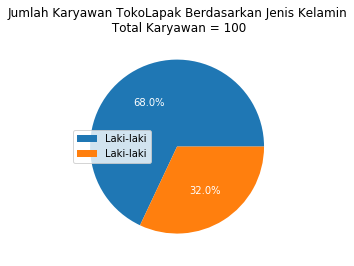

In [4]:
plt.pie(gender, autopct='%1.1f%%', textprops={'color': 'w'})
plt.title('Jumlah Karyawan TokoLapak Berdasarkan Jenis Kelamin\n Total Karyawan = 100')
plt.legend(profil['jenis_kelamin'], loc = 6);

In [5]:
divisi = profil.groupby('divisi', as_index = False).count().sort_values('jenis_kelamin', ascending = False).reset_index()
divisi = divisi[['divisi', 'jenis_kelamin']]
divisi.rename(columns = {'jenis_kelamin': 'jumlah_karyawan'}, inplace = True)
divisi

,divisi,jumlah_karyawan
0,Software Engineer,31
1,Business Intelligence,21
2,Customer Service,15
3,Data Engineer,14
4,Data Science,10
5,Marketing,9


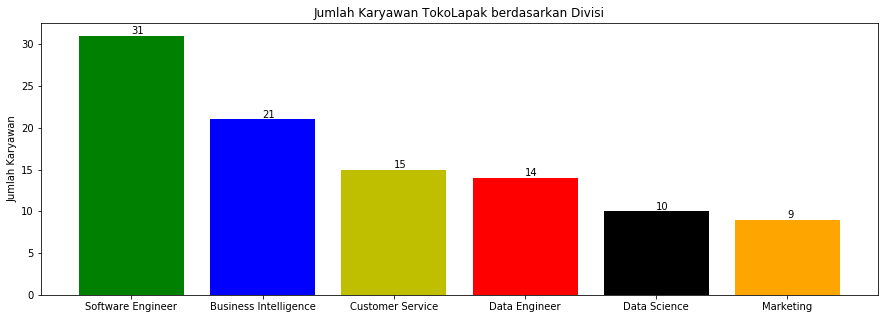

In [6]:
plt.figure(figsize=(15,5))
colors = ['g', 'b', 'y', 'r', 'k', 'orange']
plt.bar(divisi['divisi'], divisi['jumlah_karyawan'], color = colors)
plt.title('Jumlah Karyawan TokoLapak berdasarkan Divisi')
plt.ylabel('Jumlah Karyawan')

for i in range(len(divisi)):
    plt.text(divisi['divisi'][i], divisi['jumlah_karyawan'][i] + 0.2, divisi['jumlah_karyawan'][i])

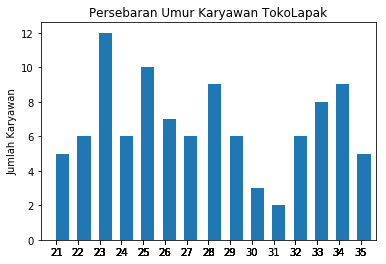

In [7]:
plt.hist(profil['umur'], bins = len(profil), width = 0.6)
plt.title('Persebaran Umur Karyawan TokoLapak')
plt.xticks(profil['umur'])
plt.ylabel('Jumlah Karyawan');

Dari eksplorasi data di atas dapat disimpulkan bahwa:
1. Jumlah total karyawan = 100 orang
2. Jumlah karyawan laki - laki = 68 orang dan jumlah karyawan perempuan = 32 orang
3. Divisi dengan jumlah karyawan terbanyak = Software Engineer, berjumlah = 31 orang
4. Persebaran umur karyawan cukup merata namun cukup didominasi oleh umur < 30

## Menjawab Persoalan

### 1. Jumlah karyawan TokoLapak yang melakukan mudik 2019

In [8]:
lokasi_lebaran = lokasi[lokasi['tanggal'] == '05/06/19']
jabodetabek = lokasi_lebaran['lokasi_dominan'].str.contains('Jakarta|Bogor|Depok|Tangerang|Bekasi')

# jumlah karyawan yg di Jabodetabek = tidak mudik
jabodetabek_mudik = jabodetabek.value_counts().reset_index()
jabodetabek_mudik['jumlah_mudik'] = jabodetabek_mudik['lokasi_dominan']
jabodetabek_mudik['tidak_mudik'] = jabodetabek_mudik['index']
jabodetabek_mudik[['tidak_mudik', 'jumlah_mudik']]

,tidak_mudik,jumlah_mudik
0,False,91
1,True,9


Kesimpulan, pada hari-H Lebaran, jumlah karyawan yang:
1. Tidak mudik (di Jabodetabek) = 9 orang
2. __Mudik (di luar Jabodetabek)= 91 orang__

### 2. Lima kota/kab tujuan mudik tertinggi

In [9]:
df_mudik = lokasi_lebaran[-jabodetabek]
df_mudik_lok = df_mudik['lokasi_dominan'].value_counts().head(5).reset_index()
df_mudik_lok['jumlah_mudik'] = df_mudik_lok['lokasi_dominan']
df_mudik_lok['lokasi_dominan'] = df_mudik_lok['index']
df_mudik_lok[['lokasi_dominan', 'jumlah_mudik']]

,lokasi_dominan,jumlah_mudik
0,Kabupaten Sleman,14
1,Kota Yogyakarta,11
2,Kota Medan,9
3,Kota Padang,8
4,Kabupaten Lampung Selatan,7


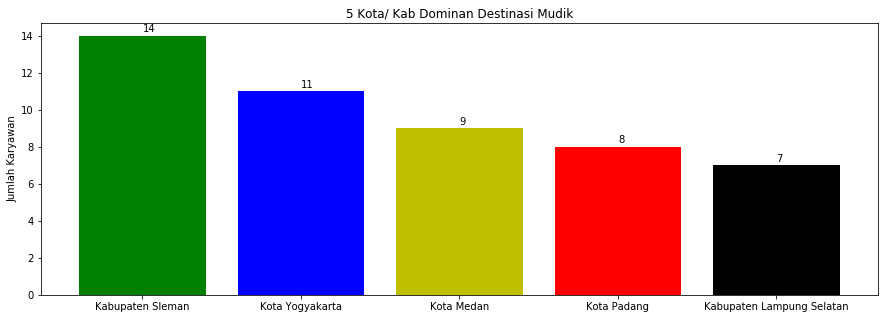

In [10]:
colors = ['g', 'b', 'y', 'r', 'k']
plt.figure(figsize=(15,5))
plt.bar(df_mudik_lok['lokasi_dominan'], df_mudik_lok['jumlah_mudik'], color = colors)
plt.title('5 Kota/ Kab Dominan Destinasi Mudik')
plt.ylabel('Jumlah Karyawan')

for j in range(len(df_mudik_lok)):
    plt.text(df_mudik_lok['lokasi_dominan'][j], df_mudik_lok['jumlah_mudik'][j] + 0.2, df_mudik_lok['jumlah_mudik'][j]);

5 Kota/ Kab yang menjadi destinasi terbanyak dari karyawan TokoLapak adalah:
1. Kab. Sleman = 14 orang
2. Kota Yogyakarta = 11 orang
3. Kota Medan = 9 orang
4. Kota Padang = 8 orang
5. Kab. Lampung Selatan = 7 orang

### 3. Hari saat karyawan paling banyak mudik

In [11]:
tidak_mudik = lokasi['lokasi_dominan'].str.contains('Jakarta|Bogor|Depok|Tangerang|Bekasi')
mudik = lokasi[-tidak_mudik]
mudik = mudik['tanggal'].value_counts().reset_index()
mudik['jumlah_mudik'] = mudik['tanggal']
mudik['tanggal'] = mudik['index']
mudik[['tanggal', 'jumlah_mudik']]

,tanggal,jumlah_mudik
0,03/06/19,93
1,05/06/19,91
2,04/06/19,91
3,02/06/19,83
4,01/06/19,73
5,31/05/19,58
6,30/05/19,34
7,29/05/19,19
8,28/05/19,9
9,26/05/19,5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


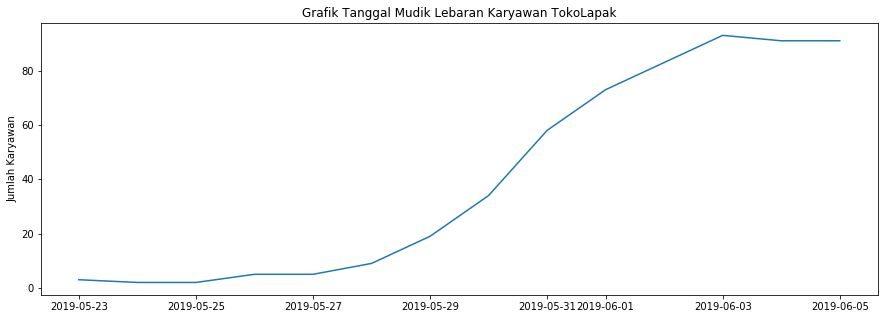

In [12]:
for x in range(len(mudik)):
    mudik['tanggal'][x] = datetime.strptime(mudik['tanggal'][x], '%d/%m/%y')

tanggal_urut = mudik.sort_values('tanggal')


plt.figure(figsize=(15,5))
plt.plot(tanggal_urut['tanggal'], tanggal_urut['jumlah_mudik'])
plt.title('Grafik Tanggal Mudik Lebaran Karyawan TokoLapak')
plt.ylabel('Jumlah Karyawan');

Hari saat karyawan mudik terbanyak adalah __Senin tanggal 3 Juni 2019__

### 4. Divisi yang karyawannya paling banyak mudik

In [13]:
divisi_mudik = df_mudik.set_index('id').join(profil.set_index('id'))['divisi'].value_counts().reset_index()
divisi_mudik['jumlah_mudik'] = divisi_mudik['divisi']
divisi_mudik['divisi'] = divisi_mudik['index']
divisi_mudik[['divisi', 'jumlah_mudik']]

,divisi,jumlah_mudik
0,Software Engineer,26
1,Business Intelligence,19
2,Customer Service,15
3,Data Engineer,13
4,Data Science,10
5,Marketing,8


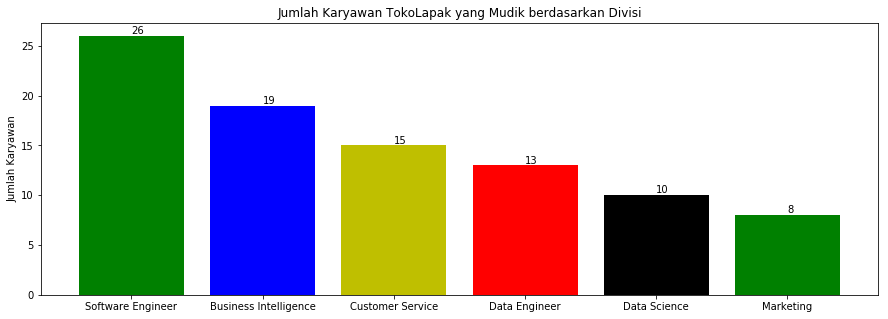

In [14]:
plt.figure(figsize=(15,5))
plt.bar(divisi_mudik['divisi'], divisi_mudik['jumlah_mudik'], color = colors)
plt.title('Jumlah Karyawan TokoLapak yang Mudik berdasarkan Divisi')
plt.ylabel('Jumlah Karyawan')

for y in range(len(divisi)):
    plt.text(divisi_mudik['divisi'][y], divisi_mudik['jumlah_mudik'][y] + 0.2, divisi_mudik['jumlah_mudik'][y])

Divisi yang karyawannya paling banyak mudik adalah __Software Engineer__

In [15]:
df_perbandingan_mudik = pd.concat([divisi['divisi'], divisi['jumlah_karyawan'], divisi_mudik['jumlah_mudik']], axis= 1)
df_perbandingan_mudik['rasio_mudik'] = (df_perbandingan_mudik['jumlah_mudik']/ df_perbandingan_mudik['jumlah_karyawan']).round(2)
df_perbandingan_mudik

,divisi,jumlah_karyawan,jumlah_mudik,rasio_mudik
0,Software Engineer,31,26,0.84
1,Business Intelligence,21,19,0.90
2,Customer Service,15,15,1.00
3,Data Engineer,14,13,0.93
4,Data Science,10,10,1.00
5,Marketing,9,8,0.89


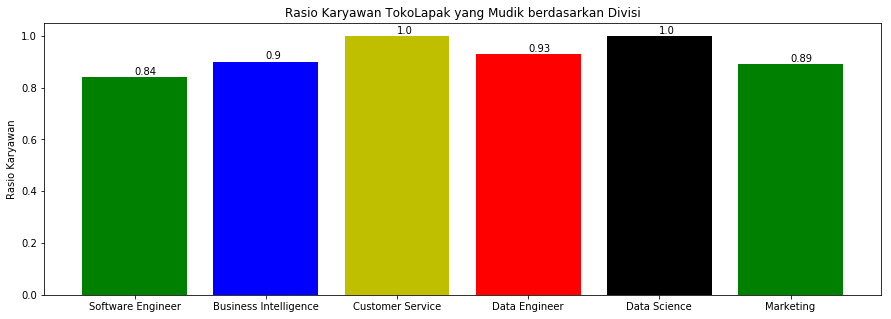

In [16]:
plt.figure(figsize=(15, 5))
plt.bar(df_perbandingan_mudik['divisi'], df_perbandingan_mudik['rasio_mudik'], color = colors)
plt.title('Rasio Karyawan TokoLapak yang Mudik berdasarkan Divisi')
plt.ylabel('Rasio Karyawan')

for z in range(len(df_perbandingan_mudik)):
    plt.text(df_perbandingan_mudik['divisi'][z], df_perbandingan_mudik['rasio_mudik'][z] + 0.01, df_perbandingan_mudik['rasio_mudik'][z])

Divisi yang karyawannya mudik semua yaitu Divisi __Customer Service dan Divisi Data Science__

### 5. Jumlah orang yang kemungkinan bisa dititipkan [Lapis Legit Zulaikha](http://www.bogasari.com/en/success-story/lapis-lagit-zulaikha-hobi-di-masa-muda-raih-sukses-di-usia-tua) (Asli Medan)

In [17]:
zulaikha = lokasi_lebaran.groupby('lokasi_dominan').count().reset_index()
zulaikha = int(zulaikha[zulaikha['lokasi_dominan'] == 'Kota Medan']['tanggal'])

print('Jumlah orang yang kemungkinan bisa dititipin Lapis Legit Zulaikha ada {} orang'.format(str(zulaikha)))

Jumlah orang yang kemungkinan bisa dititipin Lapis Legit Zulaikha ada 9 orang
